In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('titanic_train.csv')

# How big is the data?

In [3]:
df.shape

(891, 12)

# How does the data look like?

In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
812,813,0,2,"Slemen, Mr. Richard James",male,35.0,0,0,28206,10.5000,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
231,232,0,3,"Larsson, Mr. Bengt Edvin",male,29.0,0,0,347067,7.7750,NaN,S
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S


# What is the data type of cols?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Are there any missing values?

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# How does the data look mathematically?

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Are there duplicate values?

In [9]:
df.duplicated().sum()

0

# How is the correlation between cols?

In [11]:
# Select only the integer columns
int_columns = df.select_dtypes(include=['int64'])

# Calculate correlations
correlation_matrix = int_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

             PassengerId  Survived    Pclass     SibSp     Parch
PassengerId     1.000000 -0.005007 -0.035144 -0.057527 -0.001652
Survived       -0.005007  1.000000 -0.338481 -0.035322  0.081629
Pclass         -0.035144 -0.338481  1.000000  0.083081  0.018443
SibSp          -0.057527 -0.035322  0.083081  1.000000  0.414838
Parch          -0.001652  0.081629  0.018443  0.414838  1.000000


In [13]:
# Encode 'Survived' column to numeric format (0 for not survived, 1 for survived)
df['Survived'] = df['Survived'].astype(int)

# Select only the integer columns for correlation
int_columns = df.select_dtypes(include=['int64'])

# Calculate correlations with 'Survived' column
correlation_with_survived = int_columns.corrwith(df['Survived'])

# Print the correlation with 'Survived' column
print(correlation_with_survived)

PassengerId   -0.005007
Pclass        -0.338481
SibSp         -0.035322
Parch          0.081629
dtype: float64


In [14]:
# Encode 'Survived' column to numeric format (0 for not survived, 1 for survived)
df['Survived'] = df['Survived'].astype(int)

# Select the columns for correlation calculation
selected_columns = ['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Survived']

# Filter the DataFrame to include only the selected columns
selected_df = df[selected_columns]

# Calculate correlations among selected columns
correlation_matrix = selected_df.corr()

# Print the correlation matrix
print(correlation_matrix)

             PassengerId    Pclass     SibSp     Parch      Fare  Survived
PassengerId     1.000000 -0.035144 -0.057527 -0.001652  0.012658 -0.005007
Pclass         -0.035144  1.000000  0.083081  0.018443 -0.549500 -0.338481
SibSp          -0.057527  0.083081  1.000000  0.414838  0.159651 -0.035322
Parch          -0.001652  0.018443  0.414838  1.000000  0.216225  0.081629
Fare            0.012658 -0.549500  0.159651  0.216225  1.000000  0.257307
Survived       -0.005007 -0.338481 -0.035322  0.081629  0.257307  1.000000


# Univariate Analysis

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1.Categorical Data

#a. Countplot

In [20]:
import seaborn as sns 
import matplotlib.pyplot as plt

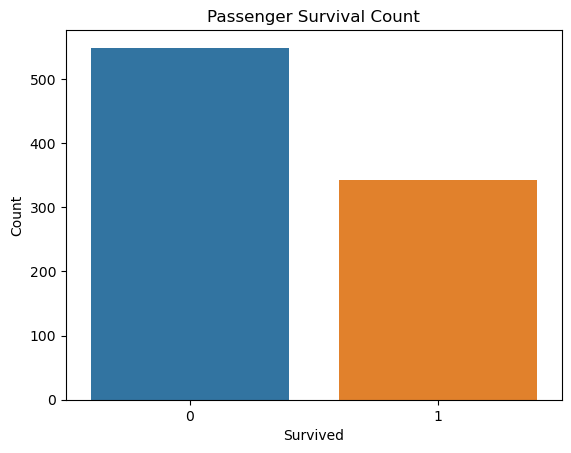

In [21]:
sns.countplot(data=df, x='Survived')

# Set labels for the plot
plt.xlabel('Survived')
plt.ylabel('Count')

# Set the title
plt.title('Passenger Survival Count')

# Show the plot
plt.show()

<Axes: xlabel='Survived'>

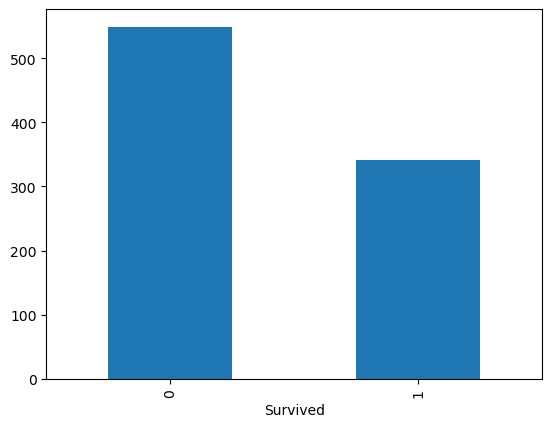

In [24]:
df['Survived'].value_counts()
df['Survived'].value_counts().plot(kind = 'bar')

In [25]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

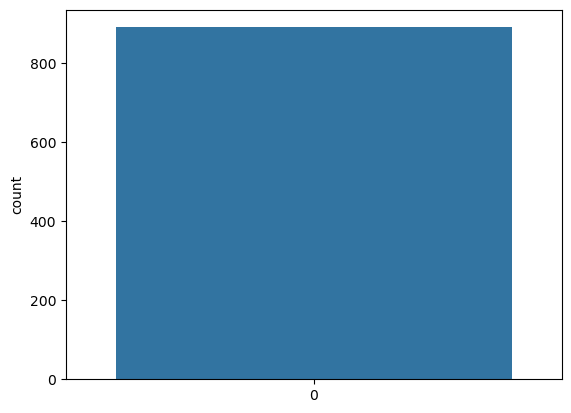

In [26]:
sns.countplot(df['Pclass'])

In [27]:
print(df['Pclass'].unique())

[3 1 2]


In [28]:
# Remove rows with missing 'Pclass' values (if any)
df = df.dropna(subset=['Pclass'])

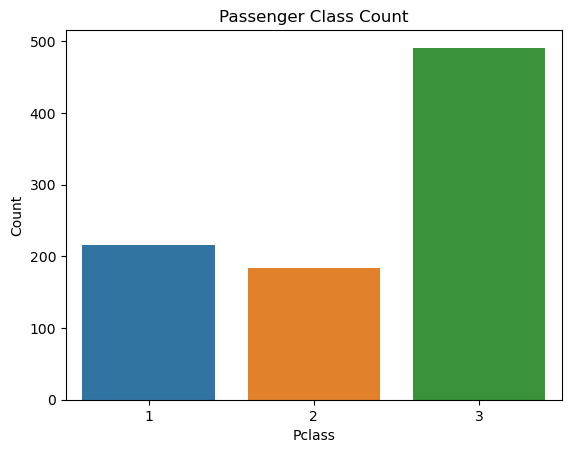

In [29]:
sns.countplot(data=df, x='Pclass')

# Set labels for the plot
plt.xlabel('Pclass')
plt.ylabel('Count')

# Set the title
plt.title('Passenger Class Count')

# Show the plot
plt.show()

# Pie chart


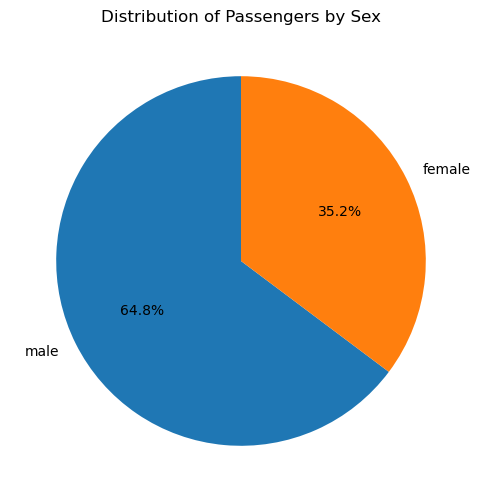

In [31]:
sex_counts = df['Sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Passengers by Sex')
plt.show()

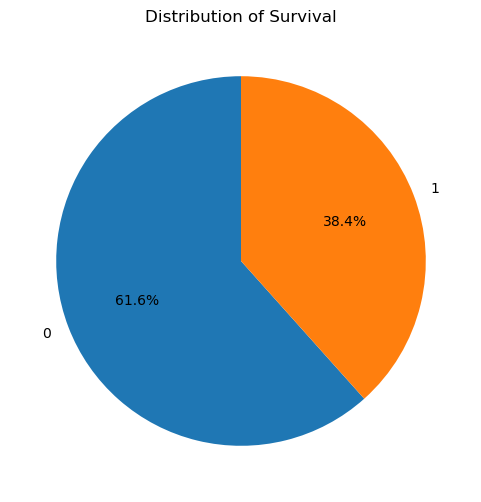

In [32]:
survived_counts = df['Survived'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Survival')
plt.show()

# 2.Numerical Data

## Histogram

(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 22., 13., 51., 40.,
        27., 46., 24., 36., 47., 27., 35., 17., 34., 29., 11., 27.,  8.,
        18.,  9., 17., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <BarContainer object of 50 artists>)

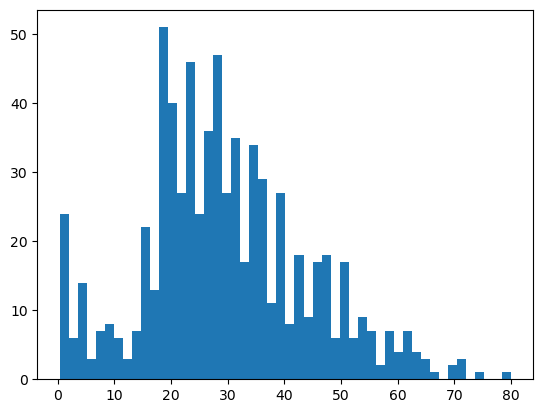

In [35]:
plt.hist(df['Age'],bins=50)

## Distplot

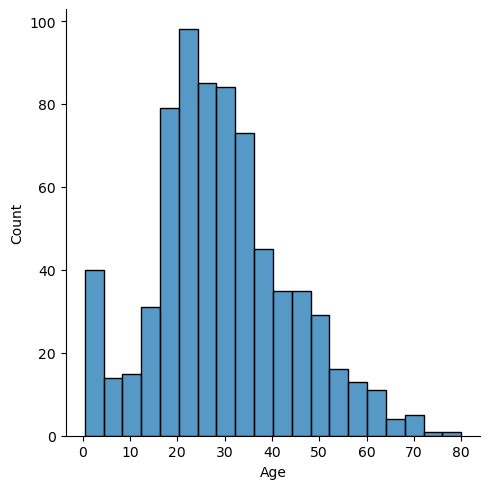

In [37]:
sns.displot(df['Age'])

C:\Users\Vipul\AppData\Local\Temp\ipykernel_14184\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

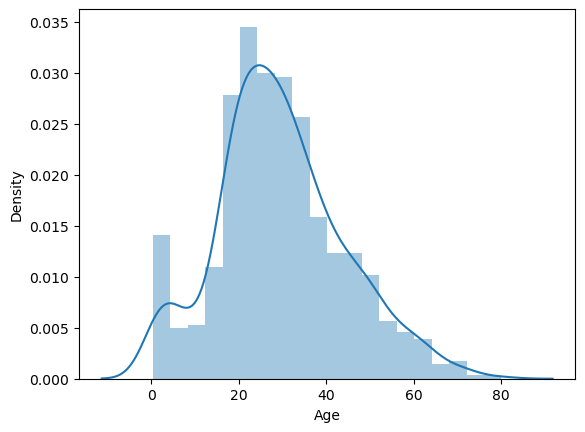

In [39]:
sns.distplot(df['Age'])

# BOxPlot

<Axes: >

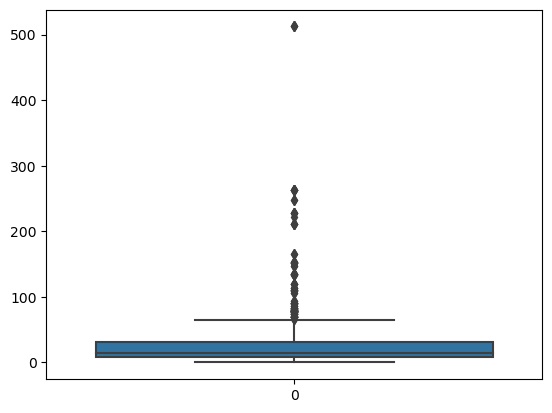

In [40]:
sns.boxplot(df['Fare'])

<Axes: >

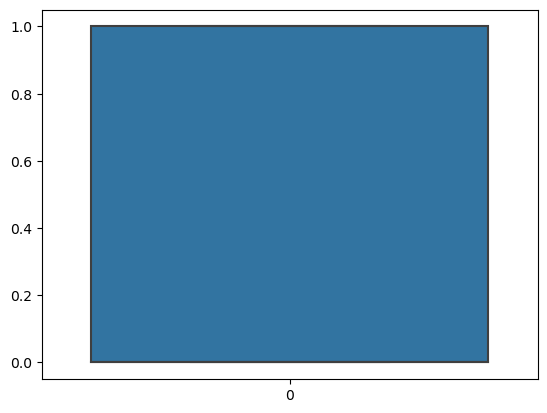

In [44]:
sns.boxplot(df['Survived'])

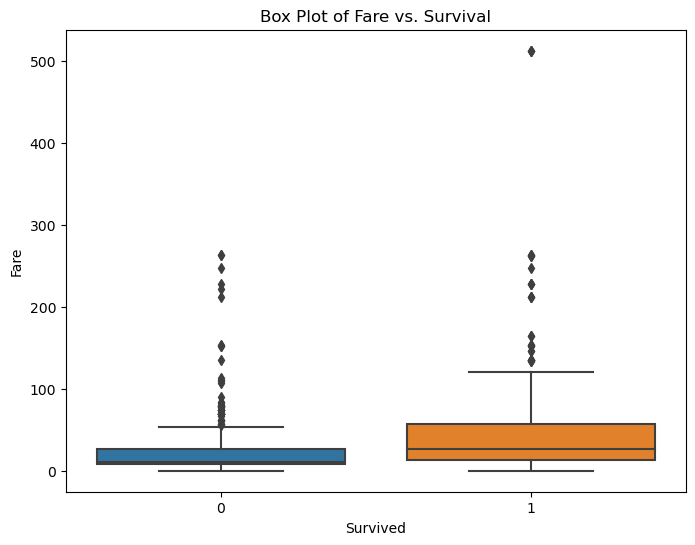

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Box Plot of Fare vs. Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

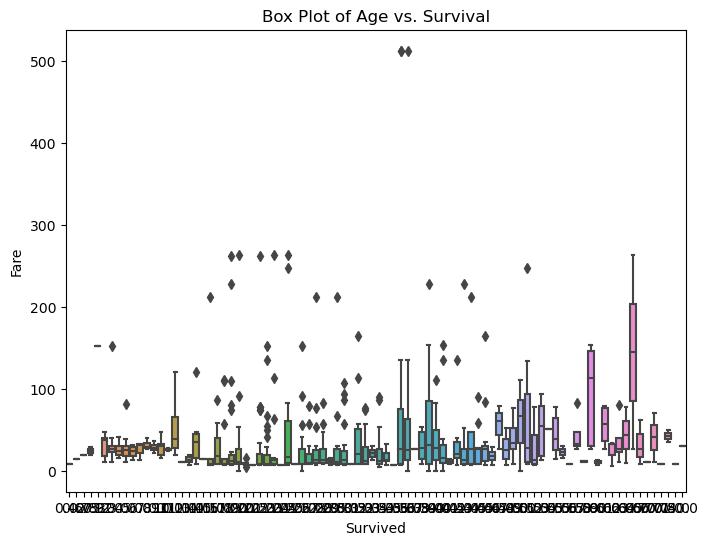

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Age', y='Fare')
plt.title('Box Plot of Age vs. Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

In [48]:
df['Age'].min()

0.42

In [49]:
df['Age'].max()

80.0

In [50]:
df['Age'].skew()

0.38910778230082704

# Bivariate/Multivariate analysis

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
tips = sns.load_dataset('tips')

In [21]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
titanic = pd.read_csv('titanic_train.csv')

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
flights = sns.load_dataset('flights')

In [25]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [26]:
iris = sns.load_dataset('iris')

In [27]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Scatterplot (Numerical-Numerical)

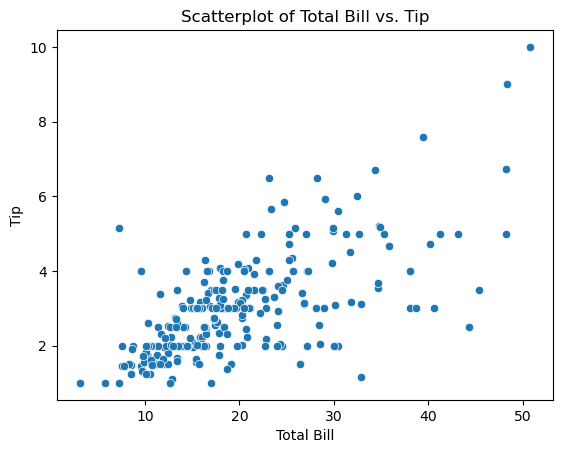

In [28]:
sns.scatterplot(x=tips['total_bill'], y=tips['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatterplot of Total Bill vs. Tip')
plt.show()

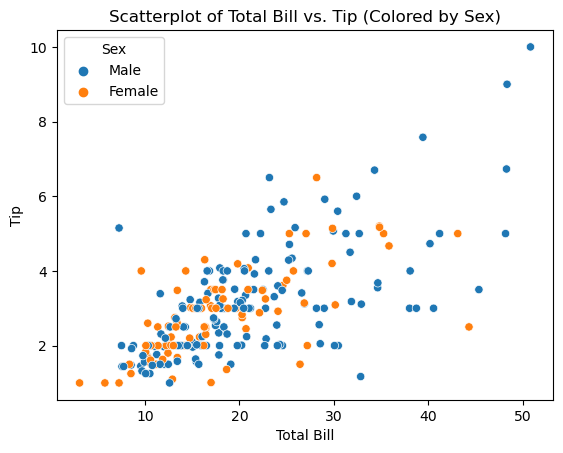

In [29]:
sns.scatterplot(x=tips['total_bill'], y=tips['tip'], hue=tips['sex'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatterplot of Total Bill vs. Tip (Colored by Sex)')
plt.legend(title='Sex')
plt.show()

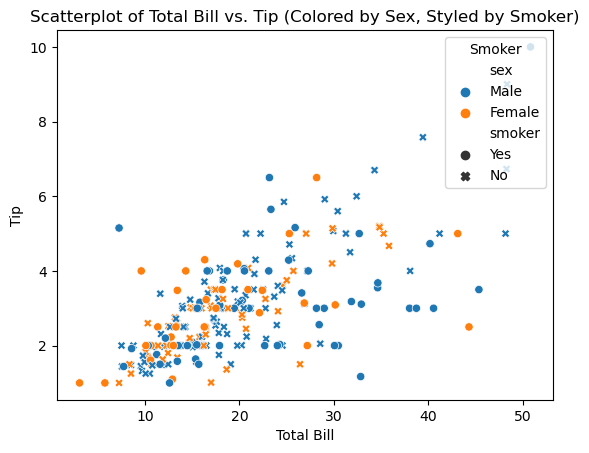

In [30]:
sns.scatterplot(x=tips['total_bill'], y=tips['tip'], hue=tips['sex'], style=tips['smoker'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatterplot of Total Bill vs. Tip (Colored by Sex, Styled by Smoker)')
plt.legend(title='Sex', loc='upper left')
plt.legend(title='Smoker', loc='upper right')
plt.show()

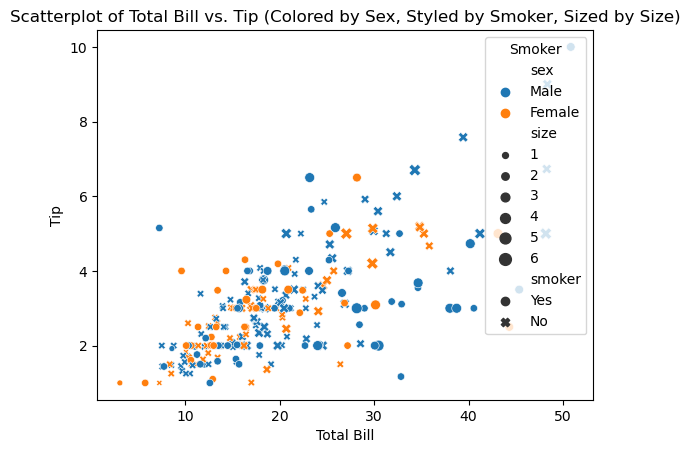

In [31]:
sns.scatterplot(x=tips['total_bill'], y=tips['tip'], hue=tips['sex'], style=tips['smoker'], size=tips['size'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatterplot of Total Bill vs. Tip (Colored by Sex, Styled by Smoker, Sized by Size)')
plt.legend(title='Sex', loc='upper left')
plt.legend(title='Smoker', loc='upper right')
plt.show()

# Bar Plot (Numerical-Categorical)

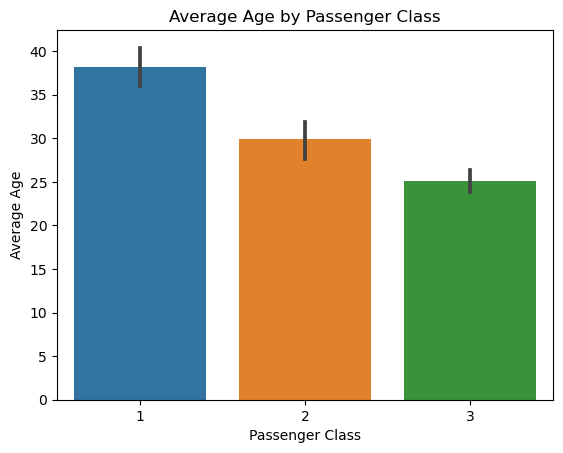

In [33]:
sns.barplot(x='Pclass', y='Age', data=titanic)
plt.xlabel('Passenger Class')
plt.ylabel('Average Age')
plt.title('Average Age by Passenger Class')
plt.show()


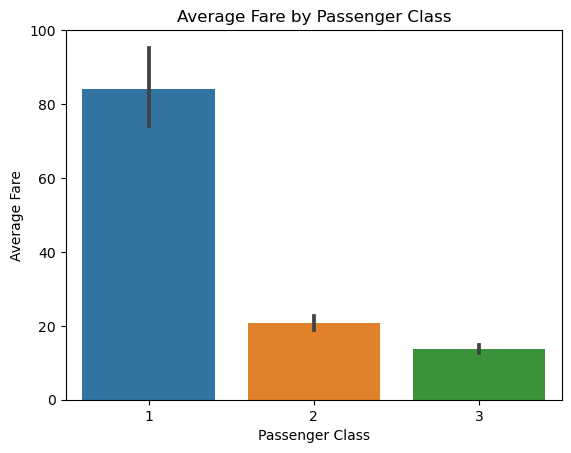

In [34]:
sns.barplot(x='Pclass', y='Fare', data=titanic)
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.title('Average Fare by Passenger Class')
plt.show()

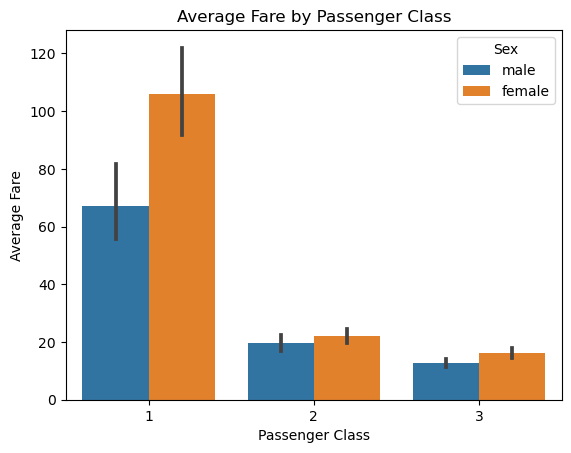

In [35]:
sns.barplot(x='Pclass', y='Fare', data=titanic, hue=titanic['Sex'])
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.title('Average Fare by Passenger Class')
plt.show()

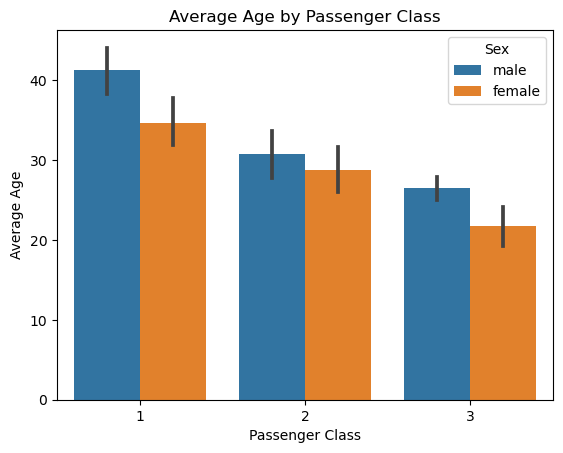

In [36]:
sns.barplot(x='Pclass', y='Age', data=titanic,hue=titanic['Sex'])
plt.xlabel('Passenger Class')
plt.ylabel('Average Age')
plt.title('Average Age by Passenger Class')
plt.show()


# Box Plot (Numerical-Categorical)

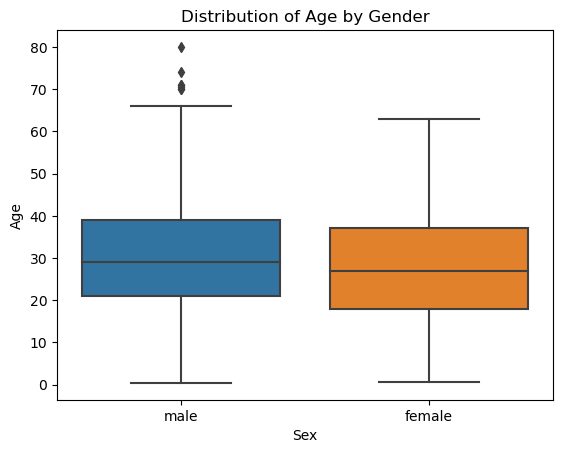

In [39]:
sns.boxplot(x='Sex', y='Age', data=titanic)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Distribution of Age by Gender')
plt.show()

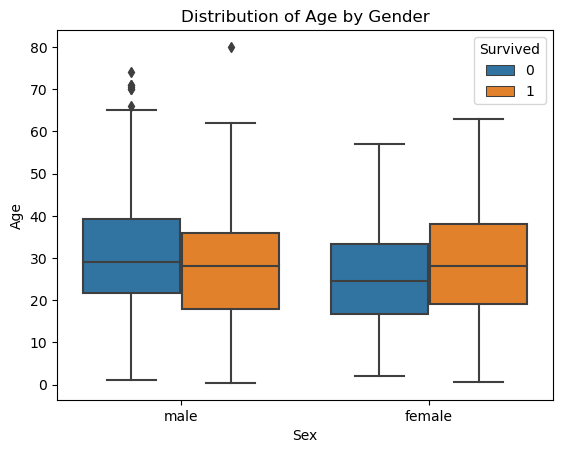

In [40]:
sns.boxplot(x='Sex', y='Age', data=titanic, hue=titanic['Survived'])
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Distribution of Age by Gender')
plt.show()

# Distplot (Numerical-Categorical)

C:\Users\Vipul\AppData\Local\Temp\ipykernel_3312\3677708691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'])


<Axes: xlabel='Age', ylabel='Density'>

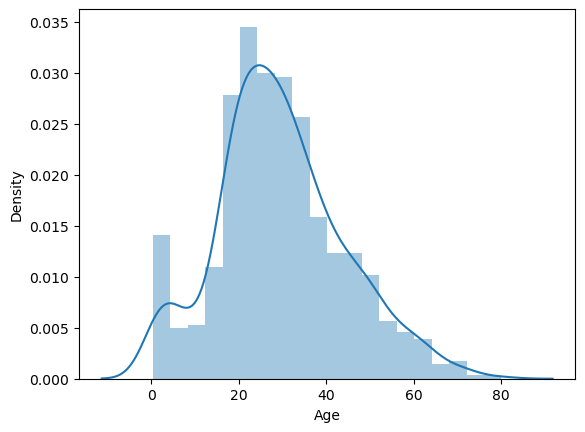

In [42]:
sns.distplot(titanic['Age'])

C:\Users\Vipul\AppData\Local\Temp\ipykernel_3312\1261424998.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==0]['Age'],hist=False)
C:\Users\Vipul\AppData\Local\Temp\ipykernel_3312\1261424998.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tit

<Axes: xlabel='Age', ylabel='Density'>

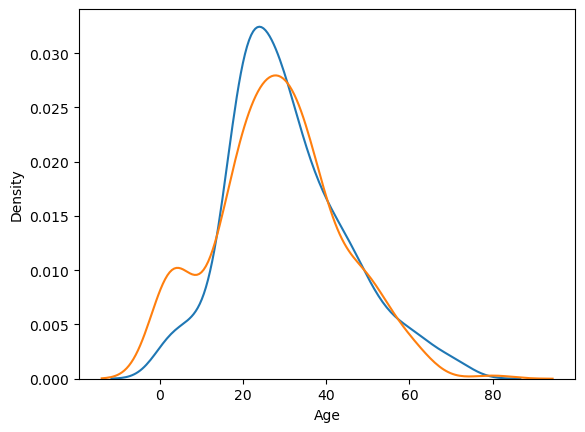

In [46]:
sns.distplot(titanic[titanic['Survived']==0]['Age'],hist=False)
sns.distplot(titanic[titanic['Survived']==1]['Age'],hist=False)

# HeatMap (Categorical-Categorical)


In [48]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [49]:
pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

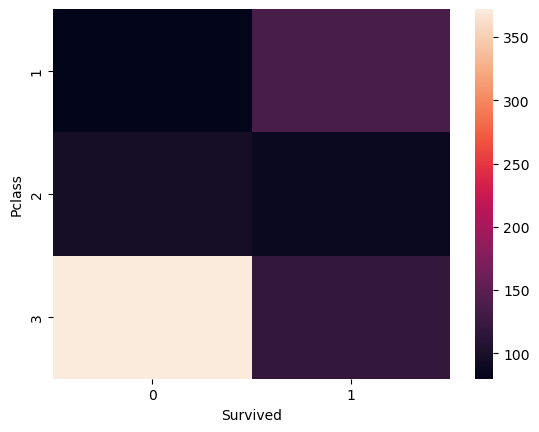

In [50]:
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))

In [52]:
survival_by_pclass = titanic.groupby('Pclass')['Survived'].mean()

# Display the result
print(survival_by_pclass)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [53]:
survival_by_pclass = (titanic.groupby('Pclass')['Survived'].mean() * 100).round(2)

# Display the result
print(survival_by_pclass)

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64


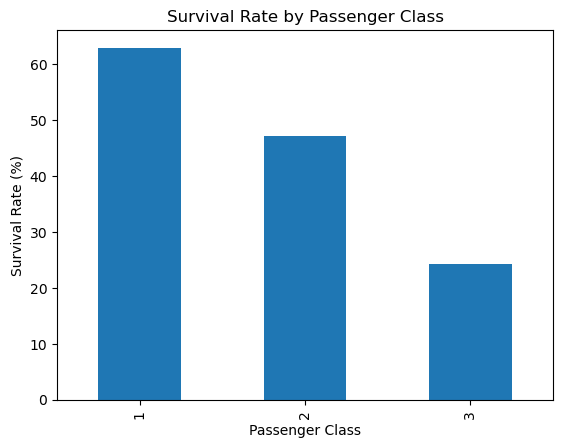

In [56]:
survival_by_pclass = (titanic.groupby('Pclass')['Survived'].mean() * 100).round(2)

# Create a bar plot
survival_by_pclass.plot(kind='bar')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Passenger Class')
plt.show()

C:\Users\Vipul\AppData\Local\Temp\ipykernel_3312\143178808.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=titanic, ci=None)


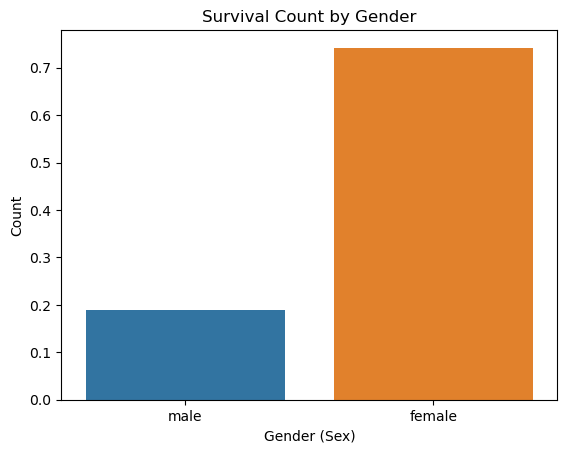

In [57]:
sns.barplot(x='Sex', y='Survived', data=titanic, ci=None)
plt.xlabel('Gender (Sex)')
plt.ylabel('Count')
plt.title('Survival Count by Gender')
plt.show()

In [58]:
survival_by_pclass = (titanic.groupby('Embarked')['Survived'].mean() * 100).round(2)

# Display the result
print(survival_by_pclass)

Embarked
C    55.36
Q    38.96
S    33.70
Name: Survived, dtype: float64


# Cluster-Map (Categorical-Categorical)

In [60]:
cross_table = pd.crosstab(titanic['SibSp'], titanic['Survived'], margins=True, margins_name='Total')

# Display the cross-tabulation table
print(cross_table)

Survived    0    1  Total
SibSp                    
0         398  210    608
1          97  112    209
2          15   13     28
3          12    4     16
4          15    3     18
5           5    0      5
8           7    0      7
Total     549  342    891


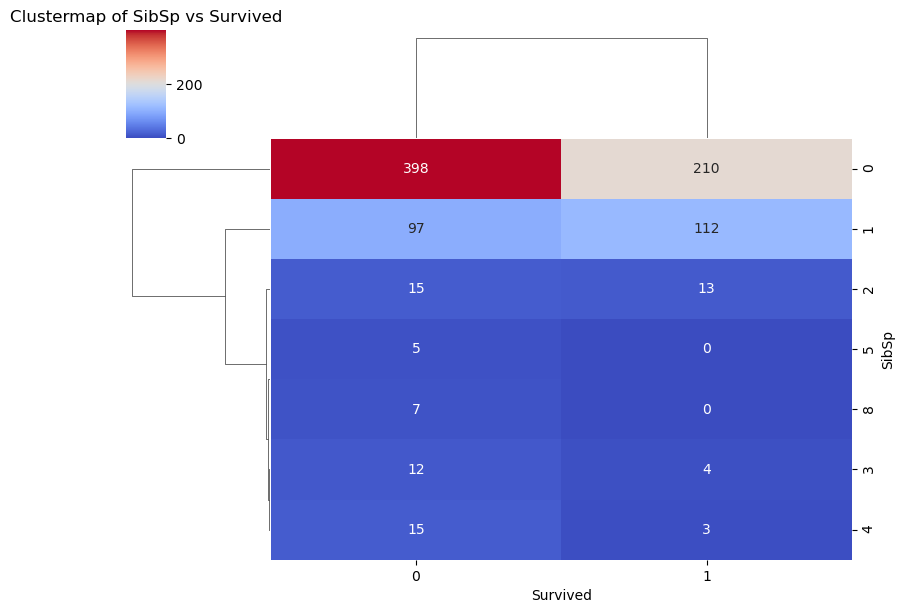

In [61]:
# Create a clustermap
sns.clustermap(cross_table.iloc[:-1, :-1], cmap='coolwarm', figsize=(8, 6), annot=True, fmt='d')
plt.title('Clustermap of SibSp vs Survived')
plt.show()

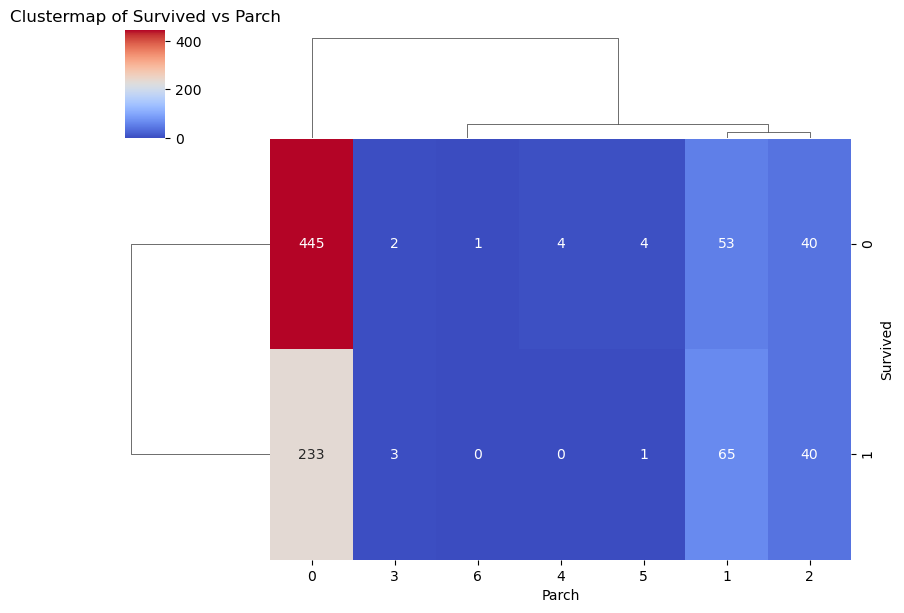

In [62]:
cross_table = pd.crosstab(titanic['Survived'], titanic['Parch'], margins=True, margins_name='Total')

# Create a clustermap
sns.clustermap(cross_table.iloc[:-1, :-1], cmap='coolwarm', figsize=(8, 6), annot=True, fmt='d')
plt.title('Clustermap of Survived vs Parch')
plt.show()

# PairPlot

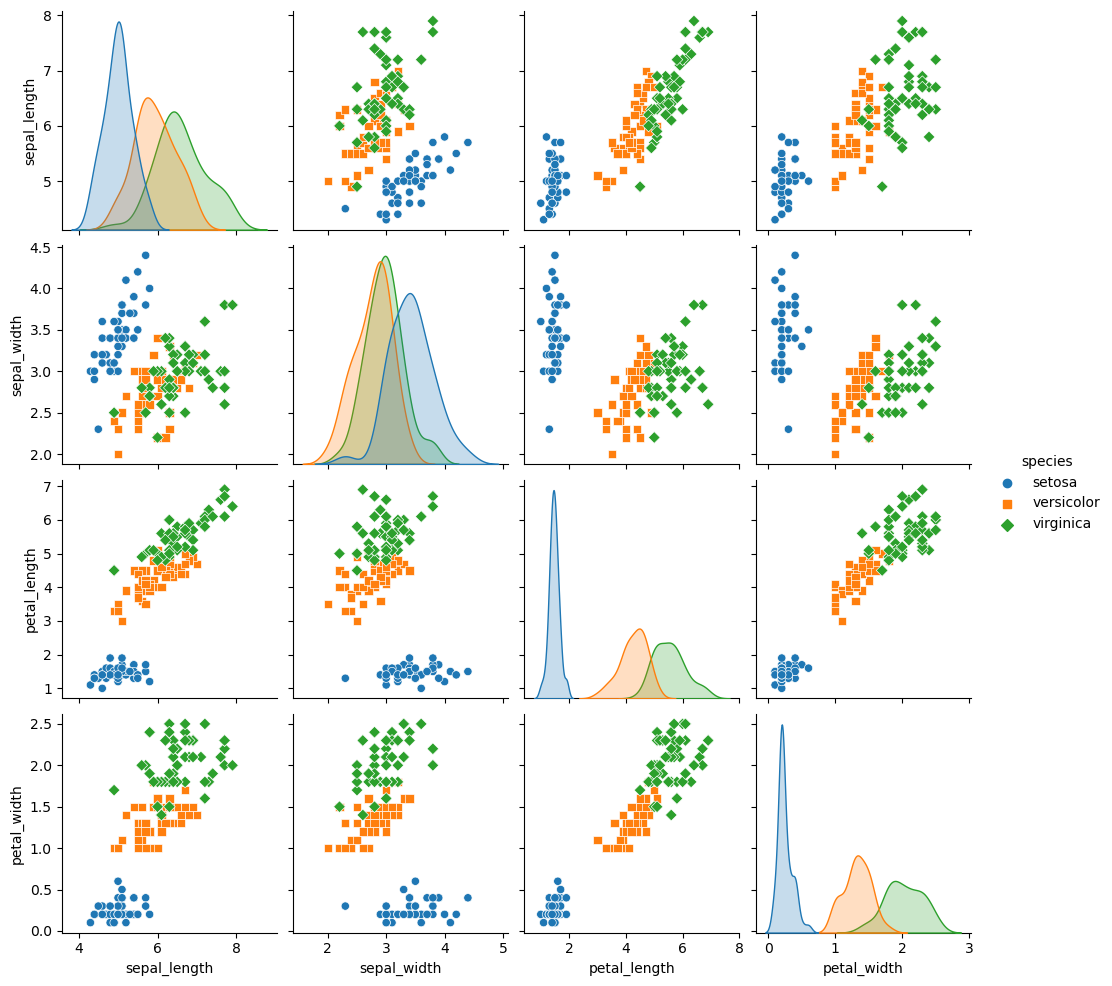

In [63]:
sns.pairplot(iris, hue='species', markers=['o', 's', 'D'])
plt.show()

# LinePlot(Numerical-Numerical)

In [67]:
# Convert the "passenger" column to a numeric data type
flights['passengers'] = pd.to_numeric(flights['passengers'], errors='coerce')


In [70]:
# Group by year and calculate the sum of passengers
df = passengers_by_year = flights.groupby('year')['passengers'].sum().reset_index()
print(df)

    year  passengers
0   1949        1520
1   1950        1676
2   1951        2042
3   1952        2364
4   1953        2700
5   1954        2867
6   1955        3408
7   1956        3939
8   1957        4421
9   1958        4572
10  1959        5140
11  1960        5714


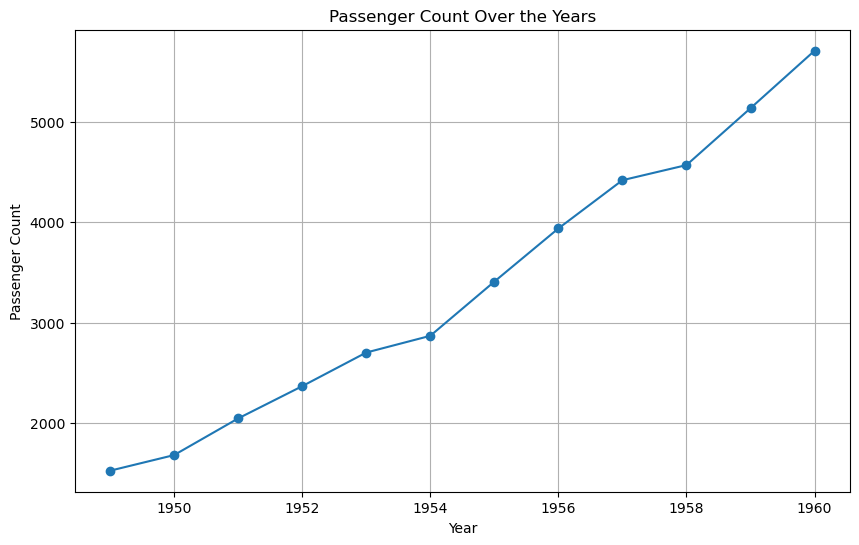

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['passengers'], marker='o', linestyle='-')
plt.title('Passenger Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.show()

In [72]:
# Create a pivot table
pivot_table = pd.pivot_table(flights, values='passengers', index='month', columns='year', aggfunc='sum')

# Display the pivot table
print(pivot_table)

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   31

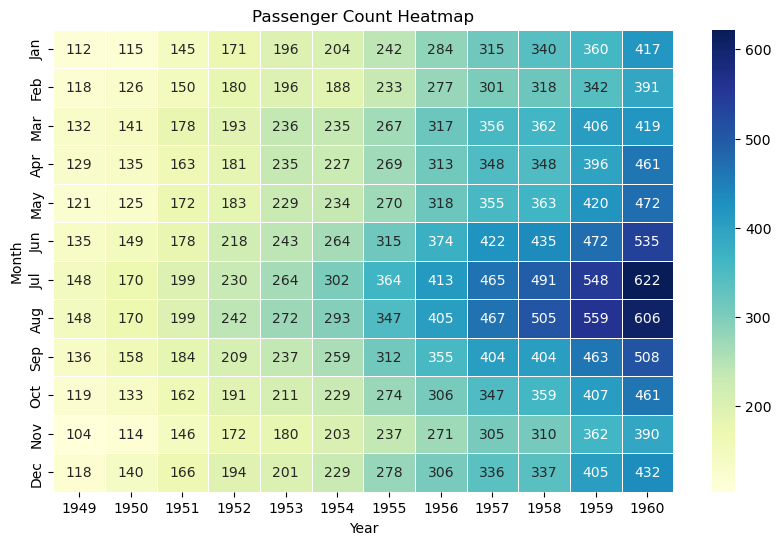

In [76]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Passenger Count Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

<Figure size 1000x600 with 0 Axes>

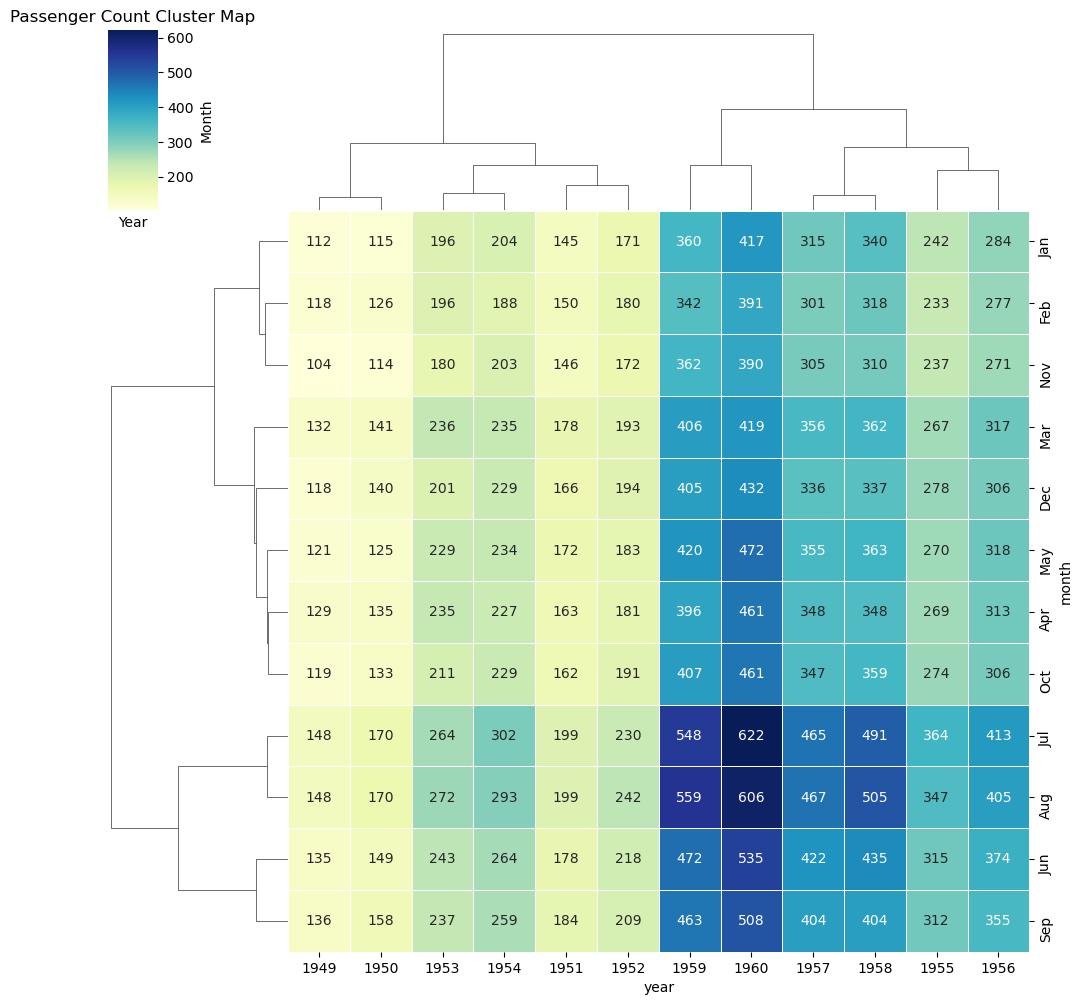

In [77]:
# Create a cluster map
plt.figure(figsize=(10, 6))
sns.clustermap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Passenger Count Cluster Map')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

In [1]:
!pip install pandas-profiling


In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport('titanic_train.csv')
prof.to_file(output_file='output.html')